# PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões

#### $\textit{- Análise do dataset Adult e aplicação do classificador K-NN}$
#### $\textit{Autor: Victor Rocha da Silva - PMR3508-2020-177}$

## 1. Preparando os dados (Data Prep)
### 1.1 Importando bibliotecas e dados
- Primeiramente, vamos importar algumas bibliotecas que serão úteis ao trabalhar com esses dados e, logo em seguida, o dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

In [2]:
adult = pd.read_csv("../input/adult-pmr3508/train_data.csv",
        names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")
adult_test = pd.read_csv("../input/adult-pmr3508/test_data.csv",
        names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

- Aqui temos uma representação de um trecho do dataset e de como ele se estrutura:

In [3]:
print('Formato do Dataset:', adult.shape)

Formato do Dataset: (32561, 15)


In [4]:
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


### 1.2 Lidando com dados faltantes (*missing data*)
- Aqui faremos uma análise acerca dos dados faltantes, verificando onde se concentram e qual a melhor maneira de lidar com eles.

In [5]:
adult.describe()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
count,32561,30725,32561,32561,32561,32561,30718,32561,32561,32561,32561,32561,32561,31978,32561
unique,74,9,21648,17,17,8,15,7,6,3,120,93,95,42,3
top,36,Private,123011,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,898,22696,13,10501,10501,14976,4140,13193,27815,21789,29849,31041,15216,29169,24719


A partir da descrição acima, notamos que os dados faltantes se concentram em três atributos diferentes: **Workclass, Occupation e Country**. Essa conclusão foi tirada pelo fato de que o contador identificou menos observações do que o total de 32561 disponíveis a priori. Temos:
- 1836 (5,63%) faltando em Workclass, 
- 1843 (5,66%) faltando em Occupation
- 583 (1,79%) faltando em Country

Vamos analisar, de maneira breve, cada um desses três atributos, para decidirmos o melhor tratamento possível:

In [6]:
print("Workclass:")
print(adult.Workclass.describe())

print("\nOccupation:")
print(adult.Occupation.describe())

print("\nCountry:")
print(adult.Country.describe())

Workclass:
count       30725
unique          9
top       Private
freq        22696
Name: Workclass, dtype: object

Occupation:
count              30718
unique                15
top       Prof-specialty
freq                4140
Name: Occupation, dtype: object

Country:
count             31978
unique               42
top       United-States
freq              29169
Name: Country, dtype: object


Percebemos, então, que é bastante válido substituir os dados faltantes pela **moda** (observação de maior frequência), já que esta observação tem alta ocorrência no dataset:

Então, vamos imputar os dados faltantes pela moda nesses atributos.

In [7]:
x = adult.Workclass.describe().top
adult.Workclass =  adult.Workclass.fillna(x)

x = adult.Country.describe().top
adult.Country =  adult.Country.fillna(x)

x = adult.Occupation.describe().top
adult.Occupation =  adult.Occupation.fillna(x)

In [8]:
adult.describe()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,74,9,21648,17,17,8,15,7,6,3,120,93,95,42,3
top,36,Private,123011,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,898,24532,13,10501,10501,14976,5983,13193,27815,21789,29849,31041,15216,29752,24719


Nas tabela acima vemos o resultado do nosso dataset após o tratamento dos dados faltantes.

Repetiremos o processo agora para o set de teste.

In [9]:
x = adult_test.Workclass.describe().top
adult_test.Workclass =  adult_test.Workclass.fillna(x)

x = adult_test.Country.describe().top
adult_test.Country =  adult_test.Country.fillna(x)

x = adult_test.Occupation.describe().top
adult_test.Occupation =  adult_test.Occupation.fillna(x)

## 2. Interpretação e análise do data frame
Nessa etapa, temos como objetivo fazer uma análise geral do nosso dataframe, analisando a correlação entre as variáveis e interpretando os dados que temos. Os gráficos serão uma ferramenta de grande importância para fazer tal análise.

### 2.1 Visão geral da base de dados
Começaremos nossa análise com alguma observações simples e relevantes sobre a base de dados.

In [10]:
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [11]:
adult.describe()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,74,9,21648,17,17,8,15,7,6,3,120,93,95,42,3
top,36,Private,123011,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,898,24532,13,10501,10501,14976,5983,13193,27815,21789,29849,31041,15216,29752,24719


A nossa base de dados é de certa forma complexa, apresentando 14 variáveis diferentes, algumas com certa redundância, como Education e Education-Num.

### 2.2 Busca por correlações entre as variáveis
Precisamos buscar **correlações** entre as variáveis, verificando quais influem significativamente na renda anual e quais não, para montar um modelo adequado e eficiente. Além disso, é valido enxergar também quais variáveis estao ligadas entre si na base. 

Para fazer isso, vamos ter que aplicar o LabelEncoder nos dados, da biblioteca scikit-learn.

In [12]:
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()

correlationMap = adult.apply(preprocessing.LabelEncoder().fit_transform).corr()
correlationMap.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
Age,1.000000,0.041031,-0.041976,-0.010325,0.035426,-0.266003,0.001970,-0.263365,0.028926,0.089160,0.098516,0.069578,0.102650,-0.000178,0.234500
Workclass,0.041031,1.000000,-0.009996,0.005100,0.011657,-0.020139,0.007503,-0.057521,0.048521,0.071890,0.004171,0.007829,0.046447,-0.001543,0.003297
fnlwgt,-0.041976,-0.009996,1.000000,-0.003022,-0.013431,0.010084,0.006161,-0.003144,-0.031568,0.016086,-0.015789,-0.022239,0.003690,-0.018948,-0.029666
Education,-0.010325,0.005100,-0.003022,1.000000,-0.362372,-0.038260,-0.041203,-0.010749,0.014205,-0.027217,0.022961,0.014303,0.043367,0.076093,0.079474
Education-Num,0.035426,0.011657,-0.013431,-0.362372,1.000000,0.005774,-0.034168,0.017223,-0.014448,0.033719,-0.040490,-0.027329,-0.025731,-0.005741,-0.151727


O jeito mais simples de enxergar essas correlações é plotando um **Heat Map** da biblioteca seaborn.
Nele, como podemos ver na legenda da direita, quanto mais clara é a célula, maior é a correlação, e quanto mais escura é a célula, menor é a correlação entre as variáveis.

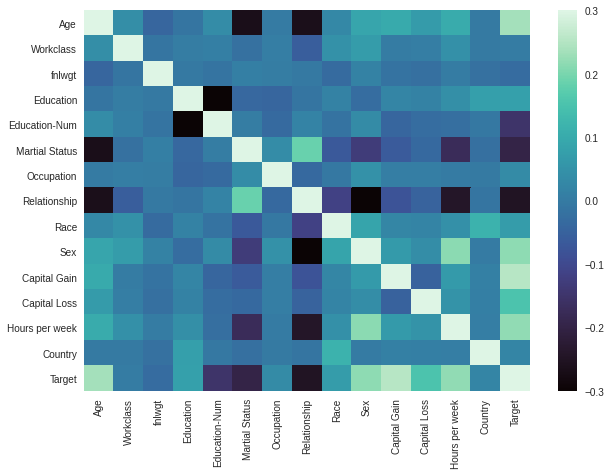

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(correlationMap, vmin=-0.3, vmax=0.3, cmap = 'mako')

Podemos tirar algumas conclusões interessantes dessa correlação:
- Justificadamente, a variável **Martial Status** está intimamente relacionada com a variável **Relationship**
    
    Apesar do fato de os tempos modernos estarem desconstruindo a ideia de um padrão de família, ainda há grande relação entre o estado civil (casado, solteiro, divorciado, etc) e o tipo de relação familiar que existe (vive em família, tem/não tem filhos, etc).
    
    
- Obtivemos uma alta correlação na matriz entre **Sex** e **Hours per week** e uma correlação média entre **Sex** e **Capital Gain**
    
    O fato do gênero estar altamente relacionado com o ganho de capital e com o número de horas trabalhadas evidencia alguma desigualdade de gênero. Esse fato será melhor analisado na análise exploratória na sequência.
    
    
- A variável **Income** (dada por Target) está altamente ligada às variáveis **Age, Sex, Capital Gain, Capital Loss e Hours per week**
    
    A terceira conclusão e, provavelmente, a mais importante para o nosso modelo nos indica quais são as principais variáveis que influenciam a renda anual da pessoa, justamente o que estamos interessados em classificar.
    
    
    
- Por último, vemos que a variável **fnlwgt** apresenta relação aproximadamente nula com todas as demais variáveis presentes, sendo pouco útil, portanto, para o nosso classificador.

Feita essa análise de correlação, podemos partir agora para uma análise exploratória da base de dados.

### 2.3 Análise exploratória dos dados
Iremos explorar os dados da base Adult e obter algumas conclusões acerca dos dados, principalmente usando gráficos. Espera-se que tanto essa etapa, como a busca por correlação seja útil na escolha dos atributos e criação do nosso modelo.
Para os gráficos, usaremos as bibliotecas Matplotlib e Seaborn, já importadas.

Primeiro, precisamos criar uma função que cria um gráfico de barras rotulado, isso será bastante útil nas nossas observações.

In [14]:
def LabeledBarPlot(df, x, label):
# plota um gráfico de barra da coluna "column" enfatizando o rótulo "label"

    print('Graph of %s and %s' %(x,label))
    
    index = df[x].unique()
    columns = df[label].sort_values().unique()
    data_to_plot = pd.DataFrame({'index': index})
    
    for column in columns:
        temp = []
        for unique in index:
            filtered_data = df[df[x] == unique]
            filtered_data = filtered_data[filtered_data[label] == column]
            
            temp.append(filtered_data.shape[0])
        data_to_plot = pd.concat([data_to_plot, pd.DataFrame({column: temp})], axis = 1)
        
    data_to_plot = data_to_plot.set_index('index', drop = True)
    
    ax = data_to_plot.plot.bar(rot=0, figsize = (14,7), alpha = 0.9, cmap = 'viridis')

Vamos começar analisando a questão do gênero relacionada os ganhos e horas de trabalho como citado anteriormente.

Graph of Sex and Target


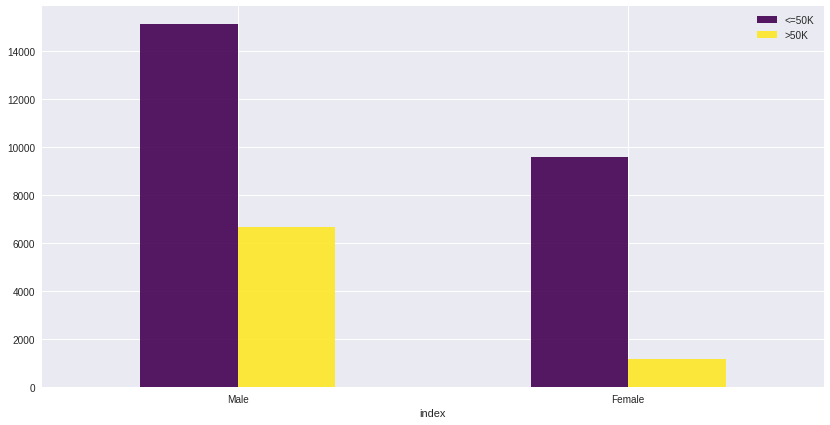

In [15]:
LabeledBarPlot(adult.drop('Id', axis=0), 'Sex', 'Target')

Graph of Sex and Education-Num


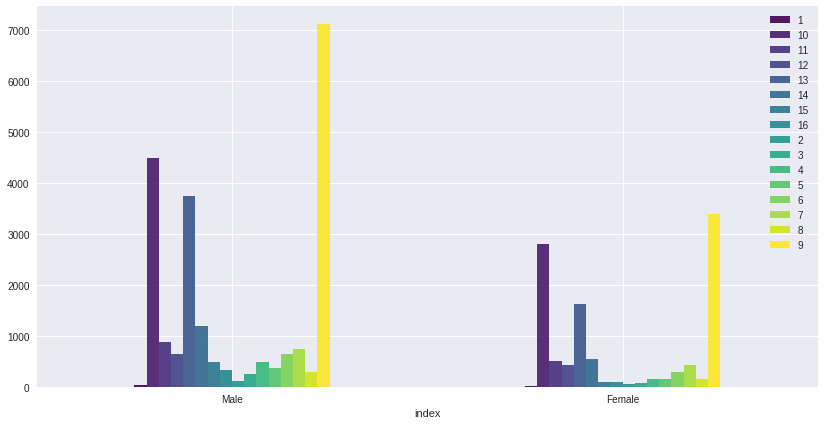

In [16]:
LabeledBarPlot(adult.drop('Id', axis=0), 'Sex', 'Education-Num')

Com os dois gráficos acima, fica claro uma questão de desigualdade de gênero. É notável que há uma grande desproporcionalidade entre o número de homens e mulheres que ganham >50K, por mais que isso também ocorra em menor escala para <=50K.
Outro fato é que as mulheres possuem menos anos de estudo quando comparado aos homens.

Vamos analisar agora a questão racial no nosso data set.

In [17]:
adult['Race'].describe()

count     32561
unique        6
top       White
freq      27815
Name: Race, dtype: object

A principio vemos que na nossa base, 27815 das pessoas são brancas, o que representa 85.4% dos dados. Logo, devemos levar em consideração que isso pode influenciar o plot do gráfico e enfatizar desproporcionalmente algumas conclusões.

Graph of Race and Target


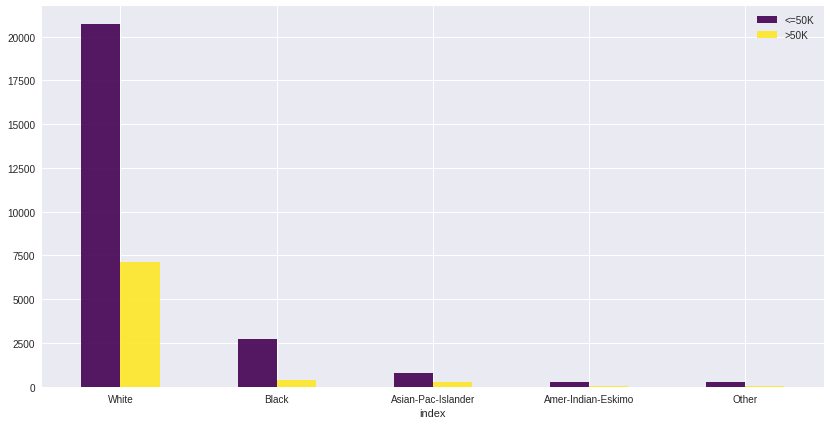

In [18]:
LabeledBarPlot(adult.drop('Id', axis=0), 'Race', 'Target')

Desconsiderando o desbalanceamento dos dados, o gráfico nos mostra que o número de brancos que ganham >50K é muito maior do que as demais etnias. Isso indica também um problema de desigualdade racial.

In [19]:
adult['Country'].describe()

count             32561
unique               42
top       United-States
freq              29752
Name: Country, dtype: object

Percebemos que a base quase como um todo é de americanos, o que torna pouco relevante para o modelo usar esse atributo.

## 3. Preprocessamento dos atributos
### 3.1 Escolha de atributos (*feature engineering*)
Nessa etapa, vamos levar em consideração o caráter do atributo (qualitativo ou numérico) e selecionar, um pouco pela intuição e um pouco pela análise dos dados que foi feita, aqueles atributos que seriam interessantes na determinação do fato da renda ser superior/inferior a 50k, isto é, úteis para o nosso classificador. 

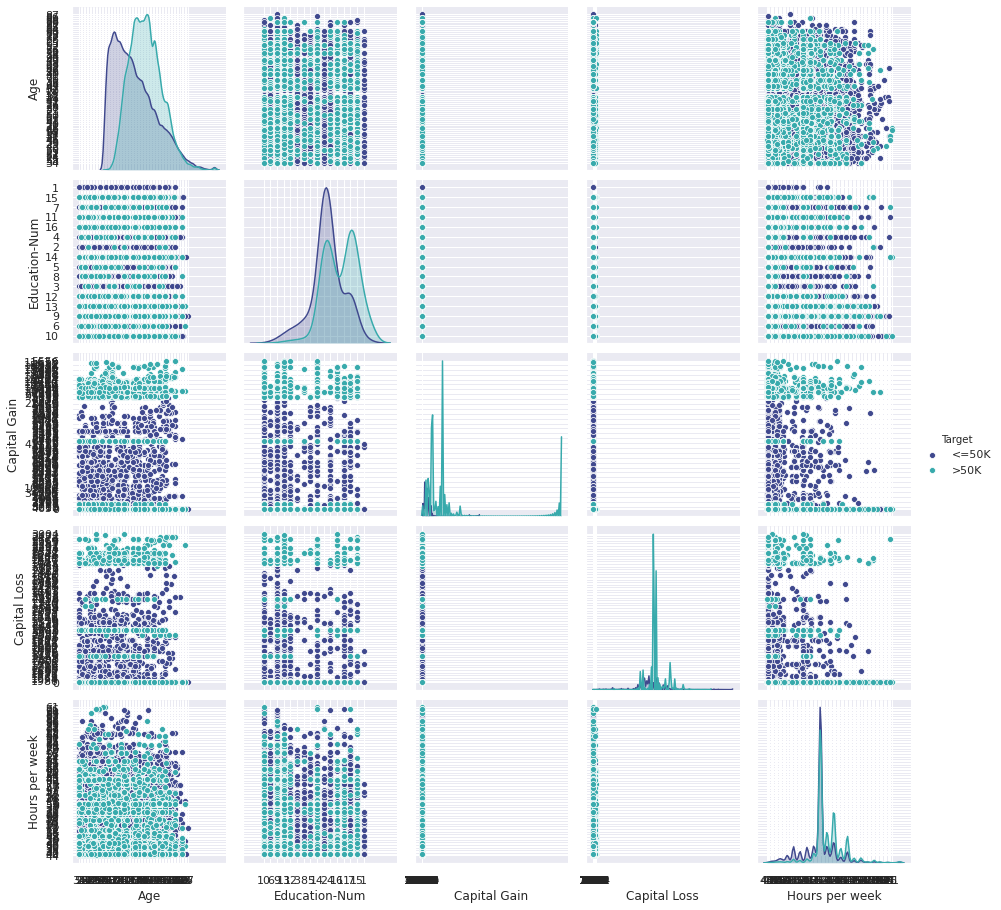

In [20]:
numericalColumns = ['Age', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week']

sns.set()
sns.pairplot(adult.drop('Id'), vars = numericalColumns, hue = 'Target', palette = 'mako', height = 2.5, diag_kws={'bw':'1.0'})

Podemos observar que certas variáveis numéricas como Education-Num, Capital Gain, Capital Loss e Hours per week conseguem, de certa forma, evidenciar a separação de rótulos, sendo muito mais úteis para treinar o modelo.

- Atributos numéricos: Age, fnlwgt, Education-Num, Capital Gain, Capital Loss e Hours per week

Quanto aos atributos numéricos, descartaremos a variável "fnlwgt", que representa o número de pessoas na população alvo que aquela unidade correspodente representa, não tendo influência sobre a classificação do KNN; 

- Atributos qualitativos: Workclass, Education, Martial Status, Occupation, Relationship, Race, Sex e Country

Quanto aos atributos qualitativos, descartaremos a variável Education, pois já existe uma variável numérica correspondente no dataset (Education-Num) e usar ambas seria redundante; descartaremos também a variável Country, pois cerca de 91,3% (28059) das observações do dataset correspondem a americanos, representando um grande desbalanceamento nos dados.

Agora, vamos subdividir as variáveis que consideramos relevantes em qualitativas e numéricas para que seja possível processá-las de maneira diferente.

In [21]:
numericalFeatures = ['Age', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week']
adult = adult.drop(columns = ['fnlwgt'])
adult_test = adult_test.drop(columns = ['fnlwgt'])

categoricalFeatures = ['Workclass', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex']
adult = adult.drop(columns = ['Education', 'Country'])
adult_test = adult_test.drop(columns = ['Education', 'Country'])

print("Atributos numéricos: ",numericalFeatures)
print("Atributos categóricos: ", categoricalFeatures)

Atributos numéricos:  ['Age', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week']
Atributos categóricos:  ['Workclass', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex']


### 3.2 Processamento dos atributos numéricos
Para os atributos numéricos, iremos aplicar uma normalização linear nos valores, já que nossas features apresentam intervalos muito diferentes de valores. O objetivo da normalização é alterar os valores das colunas numéricas no dataset para uma escala comum, sem distorcer as diferenças nos intervalos de valores. Vamos precisar do módulo de pré-processamento da biblioteca scikit-learn e do utilitário MinMaxScaler.

Faremos isso tanto na base de treino como na de teste.

In [22]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

Antes vamos precisar remover a primeira linha do data frame, pois ela conflita com a normalização. Isto ocorre porque essa primeira linha não é um dado em si e muito menos numérico, não sendo possível normalizá-lo.

In [23]:
# Vamos criar uma cópia para conseguir reverter essa exclusão posteriormente

adultCopy = adult.drop('Id', axis=0)

adult_testCopy = adult_test.drop('Id', axis=0)

Agora sim podemos aplicar a normalização sobre os dados numéricos.

In [24]:
adultCopy[numericalFeatures] = scaler.fit_transform(adultCopy[numericalFeatures])

adult_testCopy[numericalFeatures] = scaler.fit_transform(adult_testCopy[numericalFeatures])

### 3.3 Processamento dos atributos categóricos (qualitativos)
Para os atributos categóricos, iremos passar os dados para uma escala numérica. Desse modo será possível usá-los no nosso classificador K-NN. Para isso, podemos usar o utilitário LabelEncoder da biblioteca scikit-learn. 

Faremos isso tanto na base de treino como na de teste.

In [25]:
LabelEncoder = preprocessing.LabelEncoder()

# training set
adultCopy[categoricalFeatures] = adult[categoricalFeatures].apply(LabelEncoder.fit_transform)

# testing set
adult_testCopy[categoricalFeatures] = adult_test[categoricalFeatures].apply(LabelEncoder.fit_transform)

Esse é o resultado final do nosso preprocessamento dos dados de treino e teste:

Obs: devido a normalização, os dados ficaram sem "significado real", então não devemos usar esses data frames para análise exploratória, por exemplo, temos valores da idade negativos. Isso foi feito somente para melhorar o classificador.

In [26]:
adultCopy.head()

,Age,Workclass,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Target
16280,-0.335886,3,-0.0313253,0,3,3,4,1,-0.145914,-0.216663,0.288524,<=50K
16281,1.42359,1,-1.58613,2,13,0,4,1,-0.145914,-0.216663,-0.03543,<=50K
16282,-0.995689,3,-0.0313253,4,6,1,4,1,-0.145914,-0.216663,0.126547,<=50K
16283,-1.069,3,-0.0313253,0,0,1,4,0,-0.145914,-0.216663,-0.03543,<=50K
16284,1.35028,4,-0.420027,2,13,0,4,1,0.55521,-0.216663,1.58434,>50K


In [27]:
adult_testCopy.head()

,Age,Workclass,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week
0,-0.99419,3,1.14001,4,9,1,4,1,-0.142666,-0.218069,0.289097
1,1.82195,6,1.14001,2,3,0,4,1,-0.142666,-0.218069,0.36923
2,-0.560938,3,1.52951,0,3,1,4,0,-0.142666,-0.218069,-0.0314328
3,0.449982,3,-0.417965,4,6,3,4,1,-0.142666,-0.218069,-0.0314328
4,1.82195,4,1.14001,2,3,0,4,1,-0.142666,-0.218069,0.769892


## 4. Aplicação do classificador K-NN
Agora que já fizemos o tratamento, análise e preprocessamento dos dados, podemos finalmente aplicar o K-NN.
### 4.1 Busca do melhor hiperparâmetro K
Nesa parte, iremos buscar o melhor K para utilizar no K-NN, isto é, o valor de vizinhos que resultará na melhor acurácia para o classificador. Para isso, iremos avaliar a acurácia para K entre 5 e 35 (intervalo determinado pela intuição).

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Training set
Xadult = adultCopy[['Age','Workclass','Education-Num','Martial Status','Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss','Hours per week']]
Yadult = adultCopy.Target

# Testing set
XtestAdult = adult_testCopy[['Age','Workclass','Education-Num','Martial Status','Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss','Hours per week']]

accuracy = 0
bestK = 10
print('\nBuscando o melhor K...\n')

for k in range(10,30):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xadult, Yadult, cv=5)
    accuracy_ = scores.mean()
    
    if accuracy_ > accuracy:
        bestK = k
        accuracy = accuracy_
        
print('O hiperparâmetro K que minimiza a taxa de erro é: %d, com acurácia de %0.2f %%' %(bestK, accuracy*100))


Buscando o melhor K...

O hiperparâmetro K que minimiza a taxa de erro é: 24, com acurácia de 84.41 %


Chegamos em uma quantidade de vizinhos igual a 24.

Agora, vamos criar o K-NN com K=24 e treiná-lo com o nosso data set.

In [29]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(Xadult,Yadult)

KNeighborsClassifier(n_neighbors=24)

### 4.2 Predição
Após determinar o melhor K e treinar o classificador, iremos fazer a predição da variável de classe Income do set de teste usando o K-NN.

In [30]:
prediction = knn.predict(XtestAdult)

print('O nosso K-NN preveu os seguintes rótulos: ',prediction)

O nosso K-NN preveu os seguintes rótulos:  ['<=50K' '>50K' '<=50K' ... '<=50K' '<=50K' '>50K']


### 4.3 Submissão da predição
Precisamos agora transformar esse array com as predições em um data frame e em seguida exportá-lo para o formato .csv.

In [31]:
submission = pd.DataFrame(prediction)

Vamos também acrescentar a coluna Id e renomear a coluna correspondente do data frame para Income, que é o que estamos prevendo com o classificador.

In [32]:
submission[1] = prediction
submission[0] = adult_testCopy.index
submission.columns = ['Id','Income']

In [33]:
submission.head()

,Id,Income
0,0,<=50K
1,1,>50K
2,2,<=50K
3,3,<=50K
4,4,>50K


Agora, só precisamos exportar o nosso data frame com a predição para o formato .csv

In [34]:
submission.to_csv('submission.csv',index = False)